<a href="https://colab.research.google.com/github/Syed-Al-Khwarizmi/ANN-Assignment/blob/master/ANN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
labels = {0	: 'T-shirt/top',
          1	: 'Trouser',
          2	: 'Pullover',
          3	: 'Dress',
          4	: 'Coat',
          5	: 'Sandal',
          6	: 'Shirt',
          7	: 'Sneaker',
          8	: 'Bag',
          9	: 'Ankle boot'}

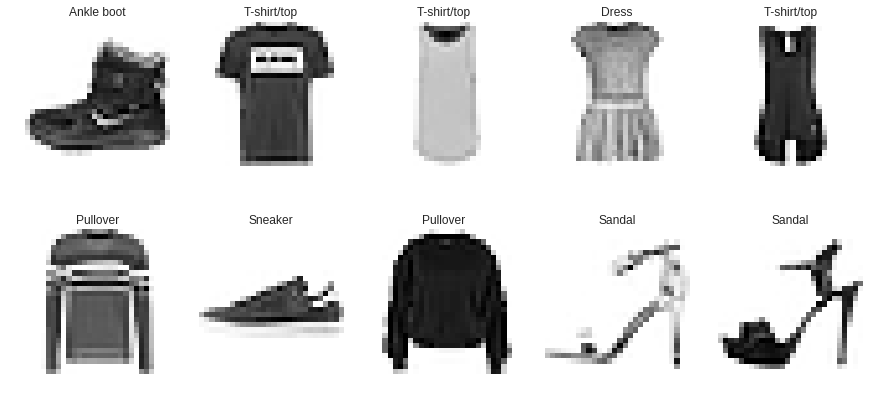

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize = (15,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i]])
  plt.axis('off')

plt.show()

In [0]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)
y_train:  (60000,)
y_test:  (10000,)


In [0]:
from keras.utils import to_categorical

X_train_flatten = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_flatten = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

X_train_normalized = X_train_flatten/255
X_test_normalized = X_test_flatten/255

y_train_encoded = to_categorical(y_train, num_classes = 10)
y_test_encoded = to_categorical(y_test, num_classes = 10)

In [0]:
print("X_train: ", X_train_normalized.shape)
print("X_test: ", X_test_normalized.shape)
print("y_train: ", y_train_encoded.shape)
print("y_test: ", y_test_encoded.shape)

X_train:  (60000, 784)
X_test:  (10000, 784)
y_train:  (60000, 10)
y_test:  (10000, 10)


In [0]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

num_classes = 10

model = Sequential()
model.add(Dense(512, input_shape=(X_train_normalized.shape[1],)))
model.add(Dense(256, activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adadelta', metrics = ['accuracy'])

In [0]:
model.fit(X_train_normalized, y_train_encoded, 
          epochs = 10, 
          validation_split = 0.1, 
          batch_size = 100)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.5711 - acc: 0.7908 - val_loss: 0.4552 - val_acc: 0.8212
Epoch 2/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.4105 - acc: 0.8485 - val_loss: 0.4041 - val_acc: 0.8487
Epoch 3/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.3657 - acc: 0.8632 - val_loss: 0.3514 - val_acc: 0.8693
Epoch 4/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.3370 - acc: 0.8754 - val_loss: 0.3767 - val_acc: 0.8553
Epoch 5/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.3146 - acc: 0.8823 - val_loss: 0.3429 - val_acc: 0.8723
Epoch 6/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.3017 - acc: 0.8866 - val_loss: 0.3682 - val_acc: 0.8660
Epoch 7/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.2864 - acc: 0.8934 - val_loss: 0.3294 - val_acc:

In [0]:
model.evaluate(X_test_normalized, y_test_encoded)

10000/10000 [==============================] - 1s 69us/step


[0.34983162972927095, 0.8748]

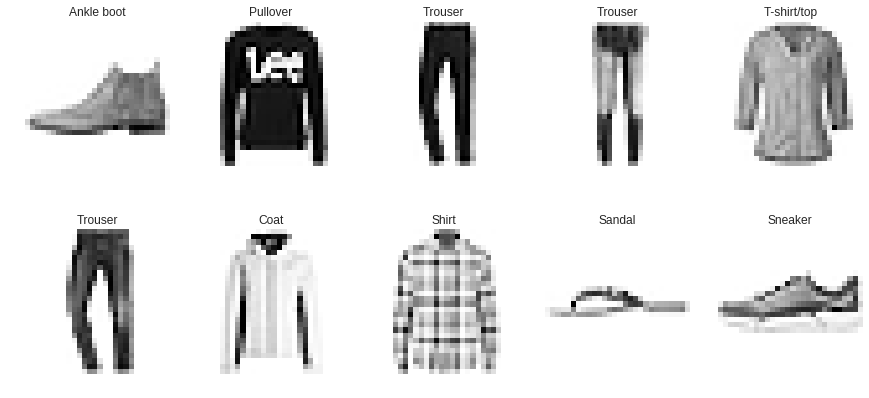

In [0]:
import numpy as np

plt.figure(figsize = (15,7))
for i in range(10):
  
  scores = model.predict(np.expand_dims(X_test_normalized[i], axis = 0))
  
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.title(labels[np.argmax(scores)])
  plt.axis('off')  
  